## **Lab2**

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Big Data/Lab2/wine_reviews_user.csv')

In [ ]:
df.head()

,Name,Variety,Origin,Attr_1,Attr_2,Alcohol_vol,Alcohol_percentage,Winemaker_notes,Review,Avg_rating,N_ratings,Price_Out-of-stock,Price
0,M. Chapoutier La Combe Pilate Esteban Brut Nat...,Vintage Sparkling Wine,"Rhone, France",Sparkling & Champagne,Green Wine,750.0,10.0,NaN,NaN,5.0,15.0,49.99,NaN
1,Vinos de Arganza Alvarez de Toledo Godello 2020,Godello,Spain,White Wine,NaN,750.0,0.0,This wine has a bright yellow color with fresh...,NaN,5.0,13.0,10.99,NaN
2,Louis Latour Vosne-Romanee 2019,Pinot Noir,"Vosne-Romanee, Cote de Nuits, Cote d'Or, Burgu...",Red Wine,Boutique,750.0,0.0,NaN,"Toasty, spicy aromas introduce this rich, silk...",5.0,20.0,114.99,119.99
3,Chateau Bouscaut 2020,Bordeaux Red Blends,"Pessac-Leognan, Bordeaux, France",Red Wine,NaN,750.0,14.5,"Blend: 61% Merlot, 33% Cabernet Sauvignon, 6% ...",This estate continues to produce brilliant win...,5.0,17.0,44.99,NaN
4,Brandini Barolo La Morra 2015,Nebbiolo,"Barolo, Piedmont, Italy",Red Wine,Green Wine,750.0,14.0,"Made with organically farmed fruit, the La Mor...","Aromas of cherries, strawberries and tar with ...",5.0,19.0,85.99,63.99


In [ ]:
df.isnull().sum()

,0
Name,1825
Variety,11618
Origin,11642
Attr_1,5118
Attr_2,354153
Alcohol_vol,1892
Alcohol_percentage,1892
Winemaker_notes,334232
Review,336911
Avg_rating,386112


### **1. Exploratory Data Analysis (EDA)**

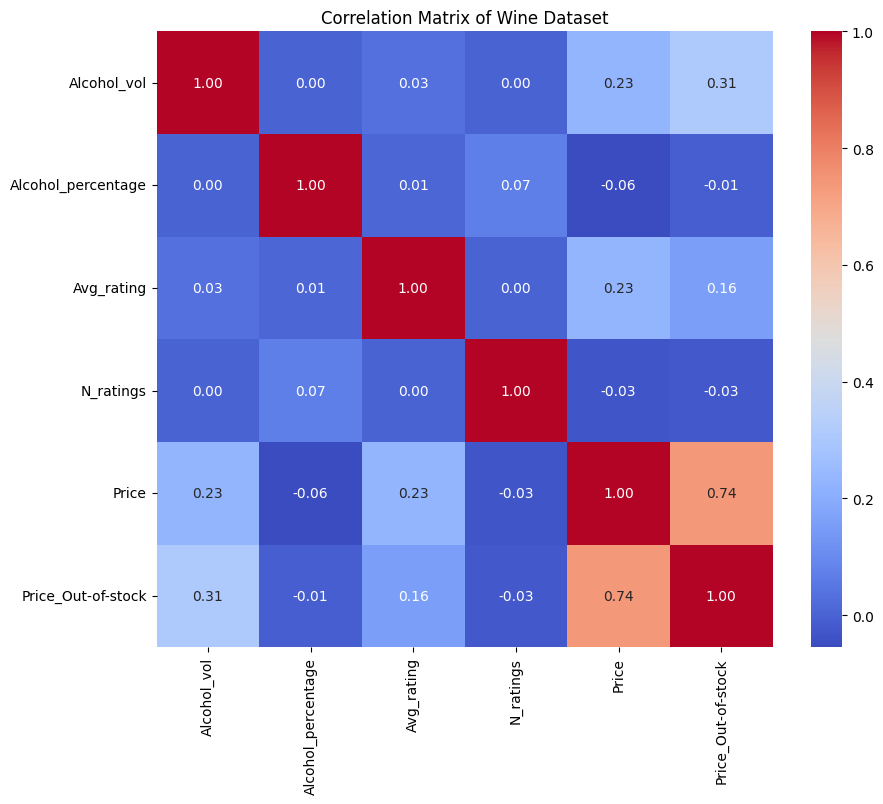

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Ensure the 'Price' and 'Price (Out-of-stock)' columns are strings
df['Price'] = df['Price'].astype(str).str.replace(',', '').astype(float)
df['Price_Out-of-stock'] = df['Price_Out-of-stock'].replace('', np.nan).astype(str).str.replace(',', '').astype(float)

# Select numerical features
numerical_features = df[['Alcohol_vol', 'Alcohol_percentage', 'Avg_rating', 'N_ratings', 'Price', 'Price_Out-of-stock']]

# Calculate the correlation matrix
correlation_matrix = numerical_features.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)

# Add title
plt.title('Correlation Matrix of Wine Dataset')

# Show the plot
plt.show()

<ipython-input-28-196175509e08>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')


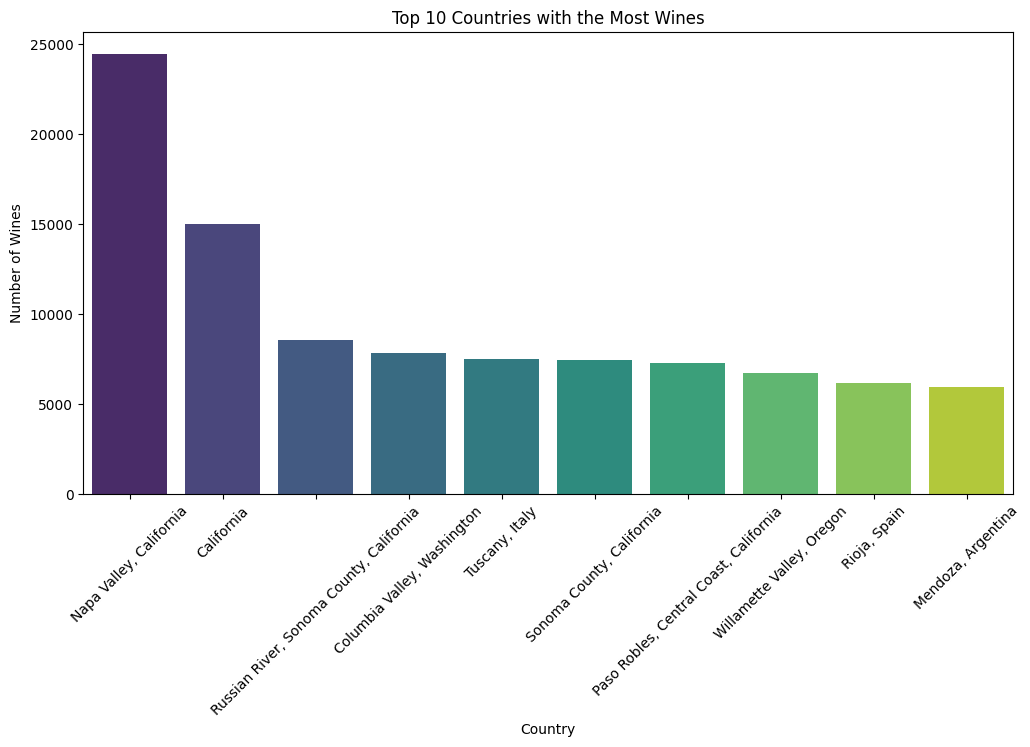

In [ ]:
# Count wines by country
country_counts = df['Origin'].value_counts()

# Select the top 10 countries
top_countries = country_counts.head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Number of Wines')
plt.title('Top 10 Countries with the Most Wines')
plt.xticks(rotation=45)
plt.show()

<ipython-input-29-1d7919c3d1ea>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_varieties.index, y=top_varieties.values, palette='magma')


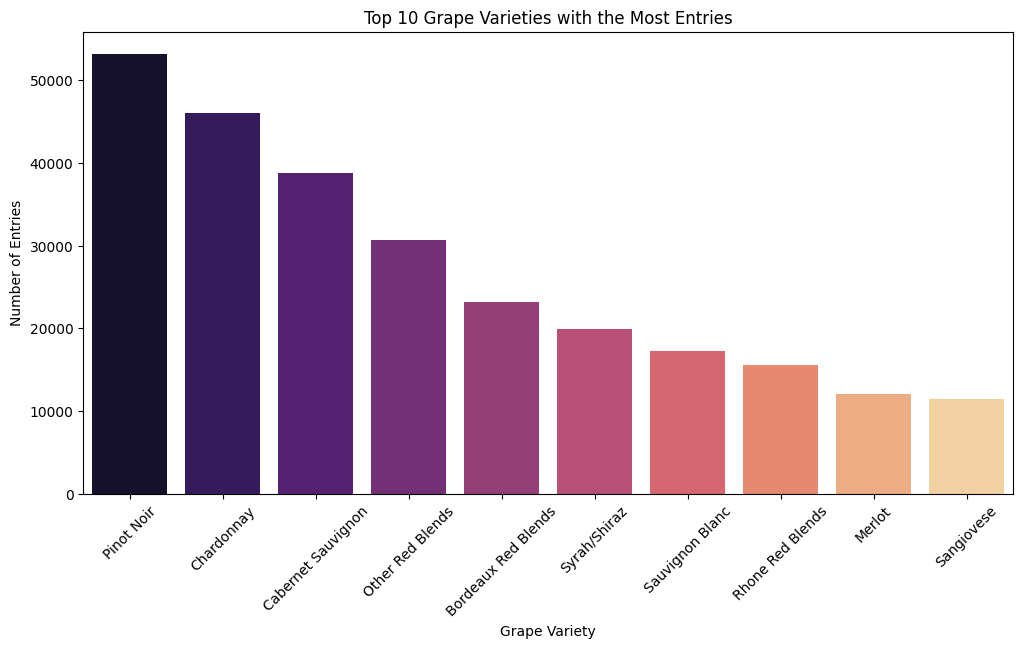

In [ ]:
# Count entries by grape variety
variety_counts = df['Variety'].value_counts()

# Select the top 10 grape varieties
top_varieties = variety_counts.head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_varieties.index, y=top_varieties.values, palette='magma')

# Add labels and title
plt.xlabel('Grape Variety')
plt.ylabel('Number of Entries')
plt.title('Top 10 Grape Varieties with the Most Entries')
plt.xticks(rotation=45)
plt.show()

<ipython-input-30-9dd590d481a0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Avg_rating', data=df, palette='coolwarm')


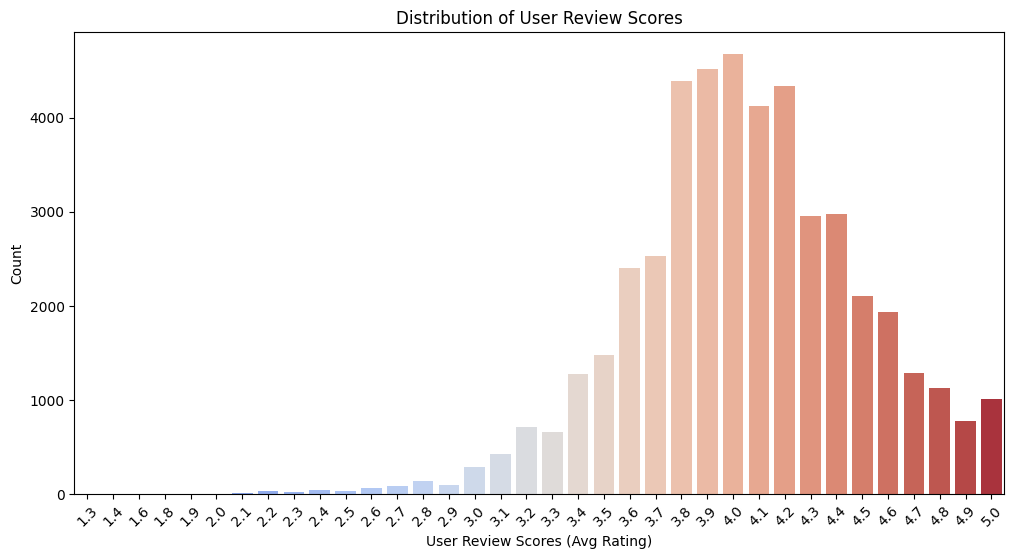

In [ ]:
plt.figure(figsize=(12, 6))

# Using a count plot for unique review scores
sns.countplot(x='Avg_rating', data=df, palette='coolwarm')

# Add labels and title
plt.xlabel('User Review Scores (Avg Rating)')
plt.ylabel('Count')
plt.title('Distribution of User Review Scores')
plt.xticks(rotation=45)
plt.show()

<ipython-input-31-47bae77df5bb>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')


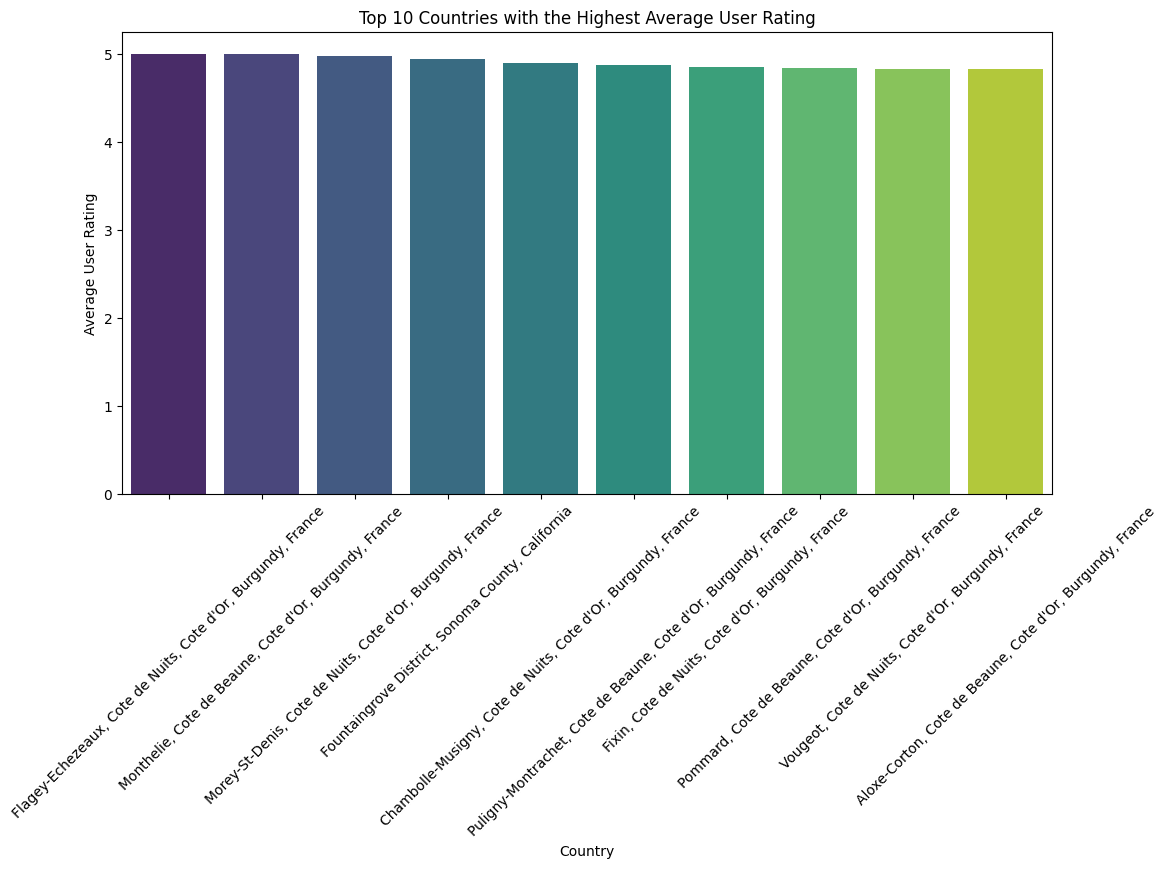

In [ ]:
# Calculate average rating by country
average_rating = df.groupby('Origin')['Avg_rating'].mean()

# Sort and select the top 10 countries by average rating
top_countries = average_rating.sort_values(ascending=False).head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Average User Rating')
plt.title('Top 10 Countries with the Highest Average User Rating')
plt.xticks(rotation=45)
plt.show()

### **2. Data Cleaning and Feature Engineering**

#### **2.1 Remove Null Values**

In [ ]:
# Step 1: Remove records with missing or null values in 'Winemaker_notes' or 'Origin'
df = df.dropna(subset=['Winemaker_notes', 'Origin'])

# Step 2: Discard any records that do not contain a review
df = df.dropna(subset=['Review'])

# Optional: Reset the index for the cleaned dataframe
df = df.reset_index(drop=True)

df.isnull().sum()

,0
Name,0
Variety,0
Origin,0
Attr_1,421
Attr_2,25600
Alcohol_vol,33
Alcohol_percentage,33
Winemaker_notes,0
Review,0
Avg_rating,29205


#### **2.2 Remove and Define**

In [ ]:
df['Price_Out-of-stock'] = df['Price_Out-of-stock'].astype(str).str.replace(r'[^0-9.]', '', regex=True)
df['Price'] = df['Price'].astype(str).str.replace(r'[^0-9.]', '', regex=True)

# Step 4: Convert cleaned columns to numeric data types (if necessary)
df['Price_Out-of-stock'] = pd.to_numeric(df['Price_Out-of-stock'], errors='coerce')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

In [ ]:
# Take 'Price' if available, otherwise take 'Price_Out-of-stock'
df['Price_Feature'] = df['Price'].combine_first(df['Price_Out-of-stock'])

# Drop the original 'Price' and 'Price_Out-of-stock' columns
df = df.drop(columns=['Price', 'Price_Out-of-stock'])
df.head()

,Name,Variety,Origin,Attr_1,Attr_2,Alcohol_vol,Alcohol_percentage,Winemaker_notes,Review,Avg_rating,N_ratings,Price_Feature
0,Chateau Bouscaut 2020,Bordeaux Red Blends,"Pessac-Leognan, Bordeaux, France",Red Wine,NaN,750.0,14.5,"Blend: 61% Merlot, 33% Cabernet Sauvignon, 6% ...",This estate continues to produce brilliant win...,5.0,17.0,44.99
1,Brandini Barolo La Morra 2015,Nebbiolo,"Barolo, Piedmont, Italy",Red Wine,Green Wine,750.0,14.0,"Made with organically farmed fruit, the La Mor...","Aromas of cherries, strawberries and tar with ...",5.0,19.0,63.99
2,Zind-Humbrecht Calcaire Pinot Gris 2018,Pinot Gris/Grigio,"Alsace, France",White Wine,Boutique,750.0,13.0,Typical pinot gris opulence tempered by limest...,"Flint, smoke, chalk and cream all appear in br...",5.0,7.0,48.99
3,Tenuta di Biserno Lodovico 2013,Bordeaux Red Blends,"Tuscany, Italy",Red Wine,Boutique,750.0,14.5,"Lodovico is a rare, unexpected assemblage from...","Only available in limited quantities, with the...",5.0,6.0,399.99
4,Louis Jadot Bonnes-Mares Grand Cru 2017,Pinot Noir,"Morey-St-Denis, Cote de Nuits, Cote d'Or, Burg...",Red Wine,Collectible,750.0,13.5,A powerful perfume of violets and red berries ...,"Extremely perfumed and aromatic character, off...",5.0,24.0,14.99


In [ ]:
# Step 6: Split 'Origin' into 'Country' and 'Region'

us_states = [
    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut',
    'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa',
    'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
    'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
    'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio',
    'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
    'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia',
    'Wisconsin', 'Wyoming'
]


def split_origin(origin):

    parts = [part.strip() for part in origin.split(',')]

    if len(parts) == 1:
        return pd.Series([parts[0], None])

    elif len(parts) >= 2:
        country = parts[len(parts)-1]
        region = parts[len(parts)-2]
        zone = parts[len(parts)-3] if len(parts) >= 3 else None
        # Assign "United States" if the region is a known US state
        if country in us_states:
            country = "United States"
        return pd.Series([country, region, zone])

    return pd.Series([None, None])  # Handle any unexpected cases

# Apply the split_origin function to the 'Origin' column
df[['Country', 'Region','Zone']] = df['Origin'].apply(split_origin)
df.drop(columns=['Origin'], inplace=True)

In [ ]:
df.head()

,Name,Variety,Attr_1,Attr_2,Alcohol_vol,Alcohol_percentage,Winemaker_notes,Review,Avg_rating,N_ratings,Price_Feature,Country,Region,Zone
0,Chateau Bouscaut 2020,Bordeaux Red Blends,Red Wine,NaN,750.0,14.5,"Blend: 61% Merlot, 33% Cabernet Sauvignon, 6% ...",This estate continues to produce brilliant win...,5.0,17.0,44.99,France,Bordeaux,Pessac-Leognan
1,Brandini Barolo La Morra 2015,Nebbiolo,Red Wine,Green Wine,750.0,14.0,"Made with organically farmed fruit, the La Mor...","Aromas of cherries, strawberries and tar with ...",5.0,19.0,63.99,Italy,Piedmont,Barolo
2,Zind-Humbrecht Calcaire Pinot Gris 2018,Pinot Gris/Grigio,White Wine,Boutique,750.0,13.0,Typical pinot gris opulence tempered by limest...,"Flint, smoke, chalk and cream all appear in br...",5.0,7.0,48.99,France,Alsace,None
3,Tenuta di Biserno Lodovico 2013,Bordeaux Red Blends,Red Wine,Boutique,750.0,14.5,"Lodovico is a rare, unexpected assemblage from...","Only available in limited quantities, with the...",5.0,6.0,399.99,Italy,Tuscany,None
4,Louis Jadot Bonnes-Mares Grand Cru 2017,Pinot Noir,Red Wine,Collectible,750.0,13.5,A powerful perfume of violets and red berries ...,"Extremely perfumed and aromatic character, off...",5.0,24.0,14.99,France,Burgundy,Cote d'Or


#### **2.3 Extract Feature**

In [ ]:
import re

def extract_year(name):
    if pd.isna(name):
        return None
    # Find a four-digit number (year) in the name
    match = re.search(r'\b(20\d{2}|19\d{2})\b', name)
    return int(match.group(0)) if match else None

# Apply the extract_year function to the 'Name' column
df['Year'] = df['Name'].apply(extract_year)

df.head()

,Name,Variety,Attr_1,Attr_2,Alcohol_vol,Alcohol_percentage,Winemaker_notes,Review,Avg_rating,N_ratings,Price_Feature,Country,Region,Zone,Year
0,Chateau Bouscaut 2020,Bordeaux Red Blends,Red Wine,NaN,750.0,14.5,"Blend: 61% Merlot, 33% Cabernet Sauvignon, 6% ...",This estate continues to produce brilliant win...,5.0,17.0,44.99,France,Bordeaux,Pessac-Leognan,2020.0
1,Brandini Barolo La Morra 2015,Nebbiolo,Red Wine,Green Wine,750.0,14.0,"Made with organically farmed fruit, the La Mor...","Aromas of cherries, strawberries and tar with ...",5.0,19.0,63.99,Italy,Piedmont,Barolo,2015.0
2,Zind-Humbrecht Calcaire Pinot Gris 2018,Pinot Gris/Grigio,White Wine,Boutique,750.0,13.0,Typical pinot gris opulence tempered by limest...,"Flint, smoke, chalk and cream all appear in br...",5.0,7.0,48.99,France,Alsace,None,2018.0
3,Tenuta di Biserno Lodovico 2013,Bordeaux Red Blends,Red Wine,Boutique,750.0,14.5,"Lodovico is a rare, unexpected assemblage from...","Only available in limited quantities, with the...",5.0,6.0,399.99,Italy,Tuscany,None,2013.0
4,Louis Jadot Bonnes-Mares Grand Cru 2017,Pinot Noir,Red Wine,Collectible,750.0,13.5,A powerful perfume of violets and red berries ...,"Extremely perfumed and aromatic character, off...",5.0,24.0,14.99,France,Burgundy,Cote d'Or,2017.0


In [ ]:
df.columns

Index(['Name', 'Variety', 'Attr_1', 'Attr_2', 'Alcohol_vol',
       'Alcohol_percentage', 'Winemaker_notes', 'Review', 'Avg_rating',
       'N_ratings', 'Price_Feature', 'Country', 'Region', 'Zone', 'Year'],
      dtype='object')

#### **2.4 Create 6 Histograms**

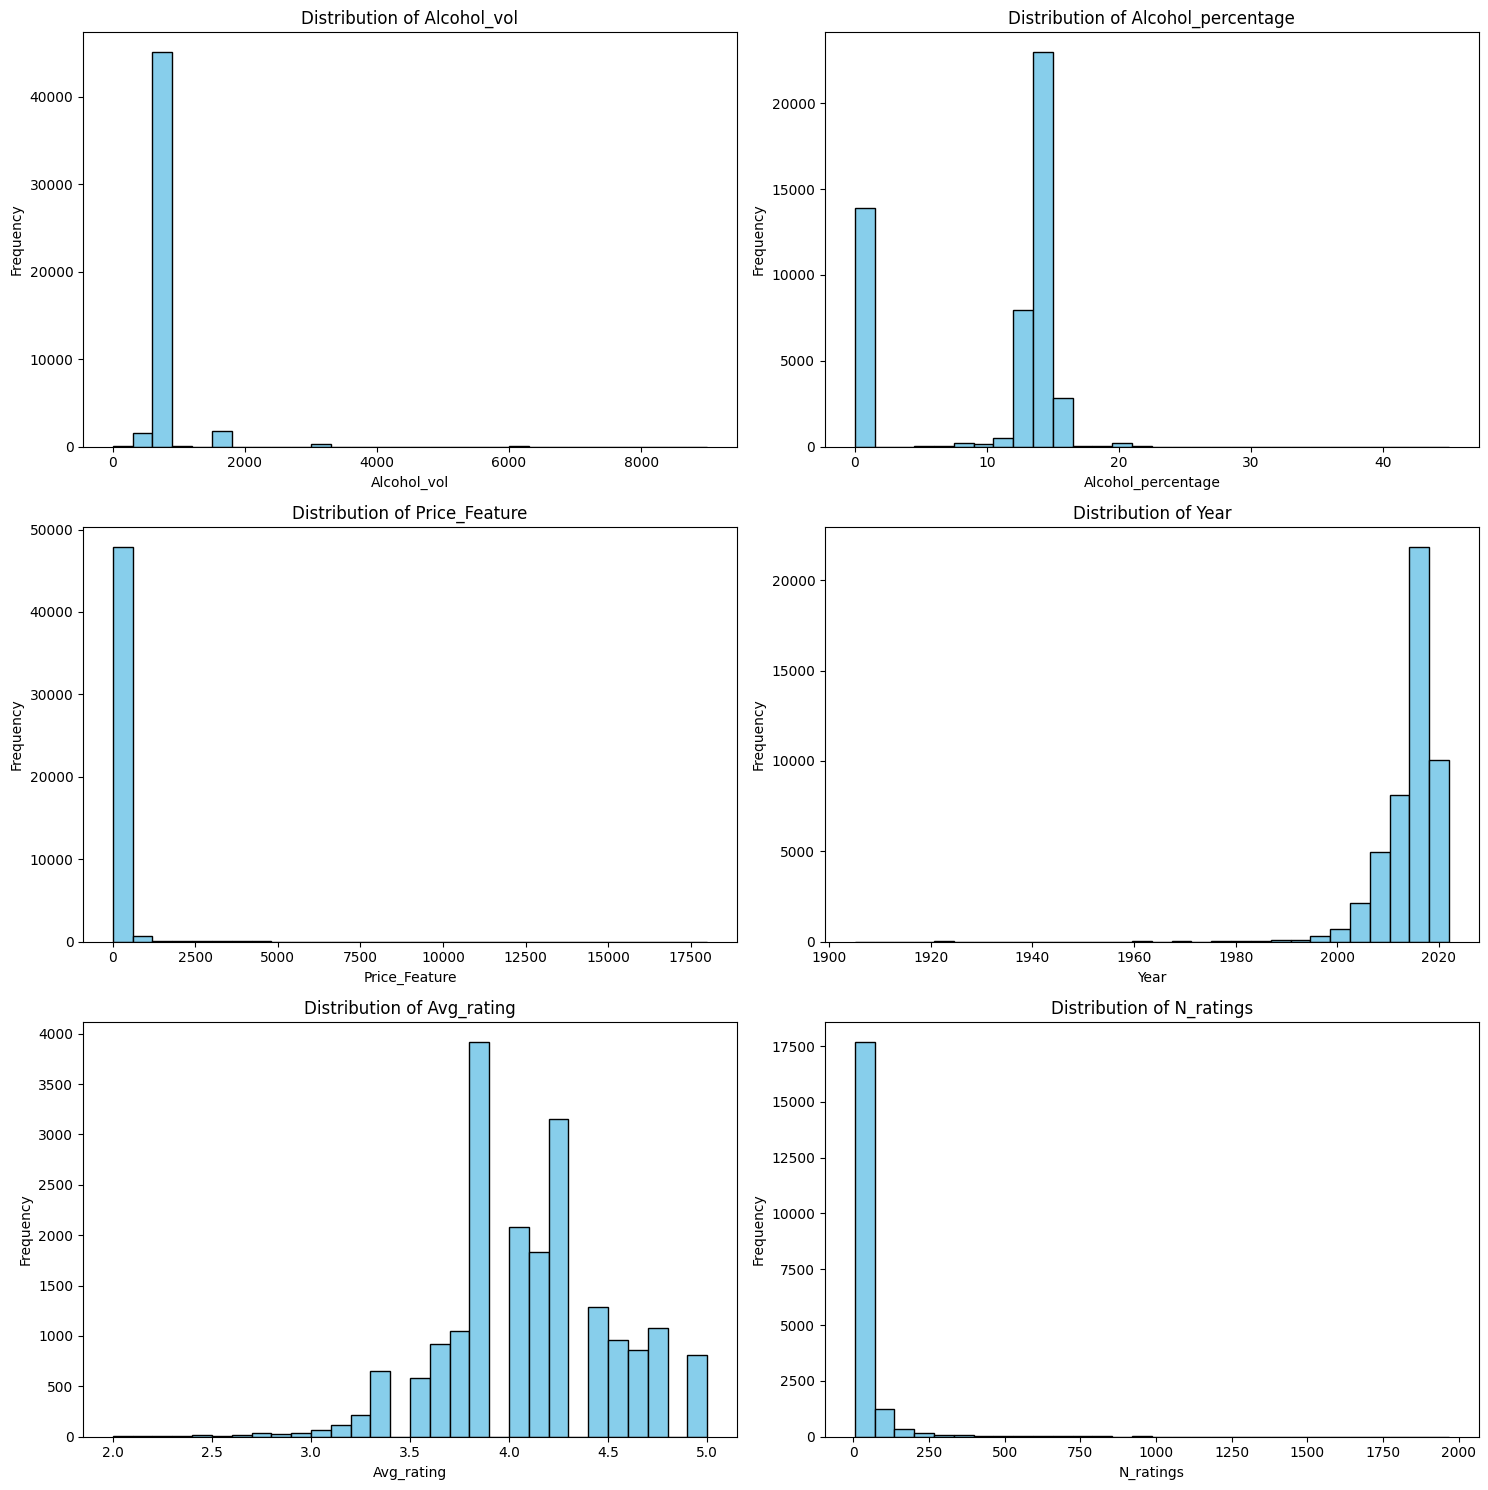

In [ ]:
# List of numerical features to plot
numerical_features = [
    'Alcohol_vol',
    'Alcohol_percentage',
    'Price_Feature',
    'Year',
    'Avg_rating',
    'N_ratings'  # Ensure to include all relevant numerical features
]

# Set up the plotting area
plt.figure(figsize=(15, 15))

# Create histograms for each numerical feature
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 2, i + 1)  # Adjust the grid size as needed
    plt.hist(df[feature].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

#### **2.5 Re-draw Figures 2,3,5**

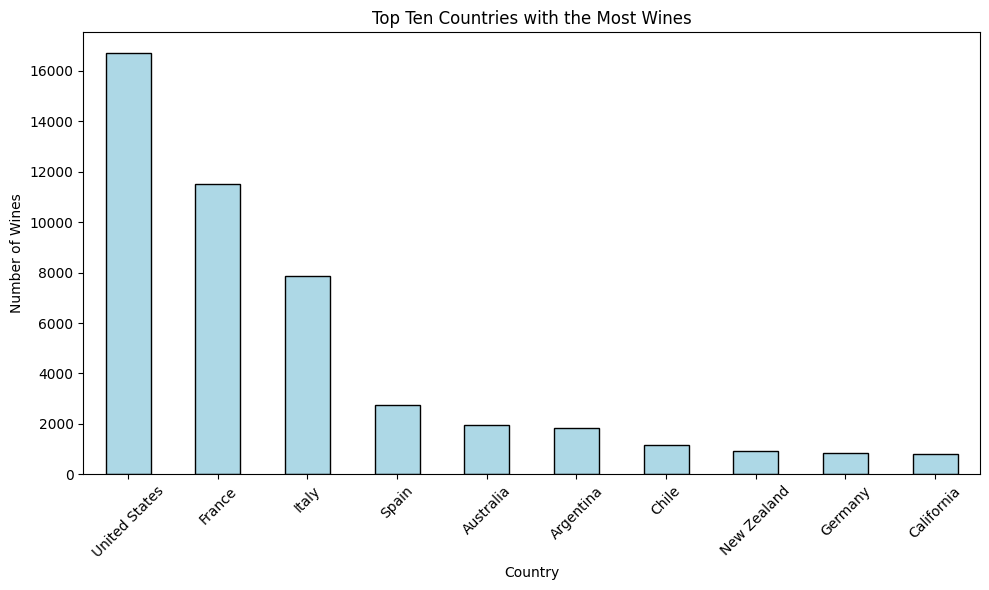

In [ ]:
# Step 1: Count the number of wines for each country
country_counts = df['Country'].value_counts()

# Step 2: Select the top ten countries
top_ten_countries = country_counts.head(10)

# Step 3: Plot the bar chart
plt.figure(figsize=(10, 6))
top_ten_countries.plot(kind='bar', color='lightblue', edgecolor='black')

# Step 4: Add titles and labels
plt.title('Top Ten Countries with the Most Wines')
plt.xlabel('Country')
plt.ylabel('Number of Wines')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

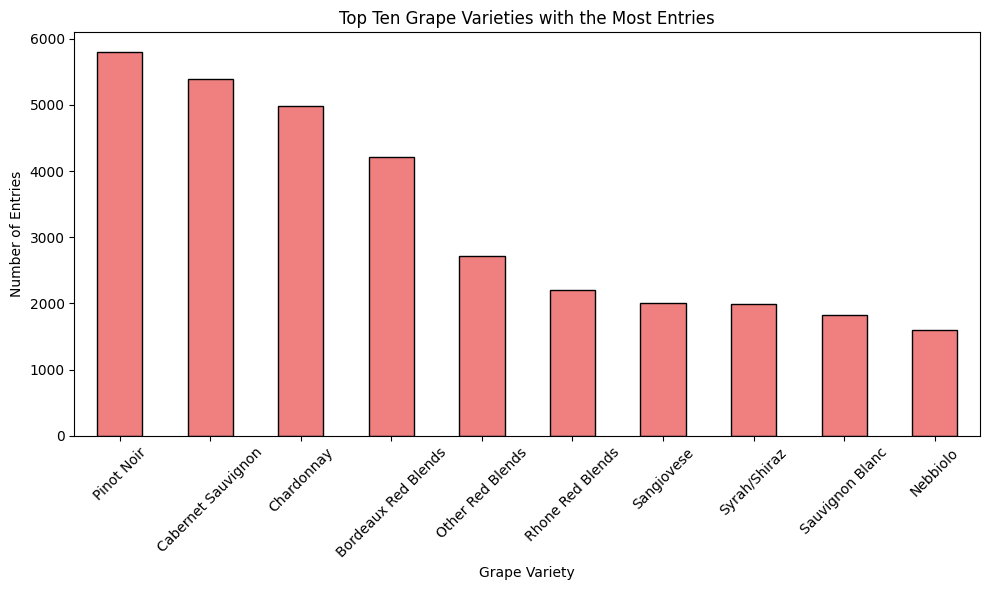

In [ ]:
# Step 1: Count the number of entries for each grape variety
variety_counts = df['Variety'].value_counts()

# Step 2: Select the top ten grape varieties
top_ten_varieties = variety_counts.head(10)

# Step 3: Plot the bar chart
plt.figure(figsize=(10, 6))
top_ten_varieties.plot(kind='bar', color='lightcoral', edgecolor='black')

# Step 4: Add titles and labels
plt.title('Top Ten Grape Varieties with the Most Entries')
plt.xlabel('Grape Variety')
plt.ylabel('Number of Entries')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

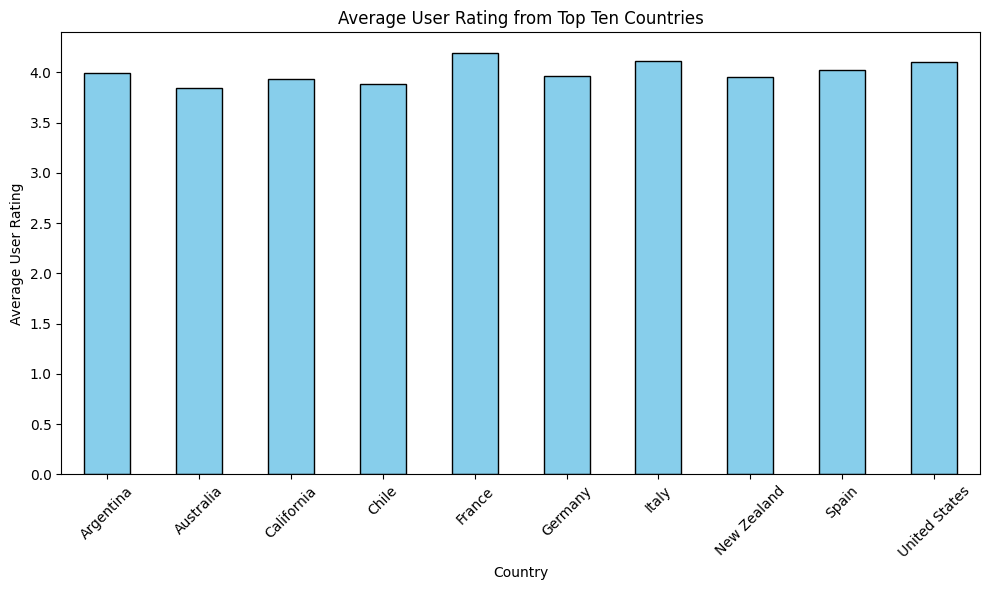

In [ ]:
# Step 1: Count the number of wines for each country
country_counts = df['Country'].value_counts()

# Step 2: Get the top ten countries
top_ten_countries = country_counts.head(10).index

# Step 3: Calculate the average rating for these countries
average_ratings = df[df['Country'].isin(top_ten_countries)].groupby('Country')['Avg_rating'].mean()

# Step 4: Plot the bar chart
plt.figure(figsize=(10, 6))
average_ratings.plot(kind='bar', color='skyblue', edgecolor='black')

# Step 5: Add titles and labels
plt.title('Average User Rating from Top Ten Countries')
plt.xlabel('Country')
plt.ylabel('Average User Rating')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()